In [11]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import cv2
import imghdr

print(tf.__version__)

2.10.0


In [12]:
data_dir = '/Users/shehanjayaratne/Documents/RMIT programming/Machine Learning/Assignment 2/CancerousCells/'

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

In [3]:
data = tf.keras.utils.image_dataset_from_directory(
    directory = data_dir,
    image_size = (27,27),
    seed = 0
)

Found 9269 files belonging to 2 classes.


2023-05-13 19:23:59.581766: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

In [6]:
batch[0]/255

array([[[[0.7882353 , 0.56078434, 0.7490196 ],
         [0.827451  , 0.5921569 , 0.7764706 ],
         [0.8627451 , 0.62352943, 0.8117647 ],
         ...,
         [0.7882353 , 0.5803922 , 0.76862746],
         [0.77254903, 0.5568628 , 0.7490196 ],
         [0.85490197, 0.64705884, 0.83137256]],

        [[0.74509805, 0.5058824 , 0.7137255 ],
         [0.8       , 0.5568628 , 0.7529412 ],
         [0.8666667 , 0.62352943, 0.8156863 ],
         ...,
         [0.80784315, 0.62352943, 0.8       ],
         [0.8392157 , 0.6509804 , 0.827451  ],
         [0.8745098 , 0.68235296, 0.85882354]],

        [[0.7372549 , 0.49411765, 0.7137255 ],
         [0.7411765 , 0.49019608, 0.69803923],
         [0.85882354, 0.60784316, 0.8039216 ],
         ...,
         [0.8784314 , 0.7411765 , 0.8745098 ],
         [0.85882354, 0.7058824 , 0.85490197],
         [0.84705883, 0.6901961 , 0.84313726]],

        ...,

        [[0.91764706, 0.7647059 , 0.8980392 ],
         [0.89411765, 0.74509805, 0.8745098 ]

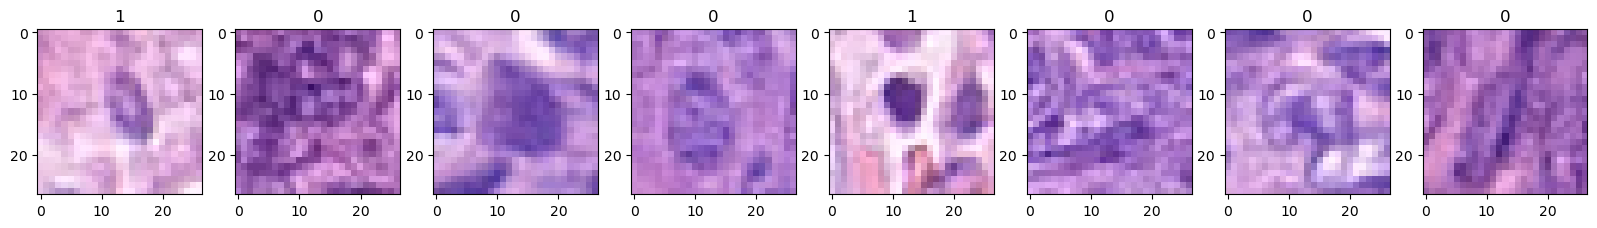

In [7]:
fig, ax = plt.subplots(ncols=8, figsize=(20,20))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
data = data.map(lambda x,y: (x/255,y))

In [10]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

TypeError: Singleton array array(<MapDataset element_spec=(TensorSpec(shape=(None, 27, 27, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>,
      dtype=object) cannot be considered a valid collection.

In [10]:
train_size = int(len(data)*.8)
test_size = int(len(data)*.2)
val_size = int(train_size * 0.25)
train_size -= val_size
print(train_size,val_size,test_size)

174 58 58


In [9]:
data.as_numpy_iterator().next()[0].max()

1.0

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+ val_size).take(test_size)

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [18]:
model = Sequential()

In [19]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [20]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 1, 1, 16)        

In [23]:
hist = model.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.5735 - accuracy: 0.6771 - val_loss: 0.4494 - val_accuracy: 0.7904
Epoch 2/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3556 - accuracy: 0.8450 - val_loss: 0.2913 - val_accuracy: 0.8836
Epoch 3/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3131 - accuracy: 0.8675 - val_loss: 0.3474 - val_accuracy: 0.8438
Epoch 4/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2899 - accuracy: 0.8816 - val_loss: 0.2738 - val_accuracy: 0.8869
Epoch 5/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2813 - accuracy: 0.8836 - val_loss: 0.2562 - val_accuracy: 0.8998
Epoch 6/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3010 - accuracy: 0.8718 - val_loss: 0.2680 - val_accuracy: 0.8971
Epoch 7/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2734 - accuracy: 0.8813 - val_loss: 0.2593 - val_accuracy: 0.8890
Epoch 

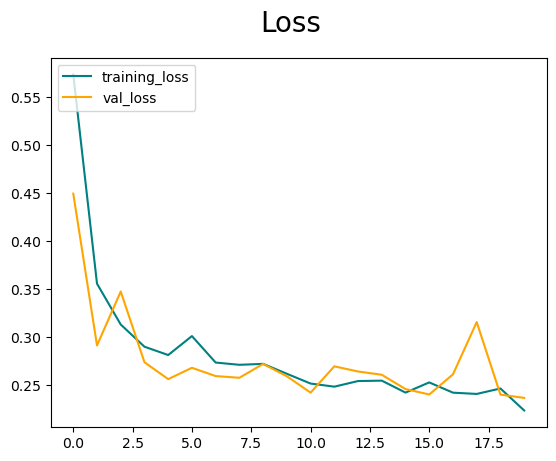

In [24]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

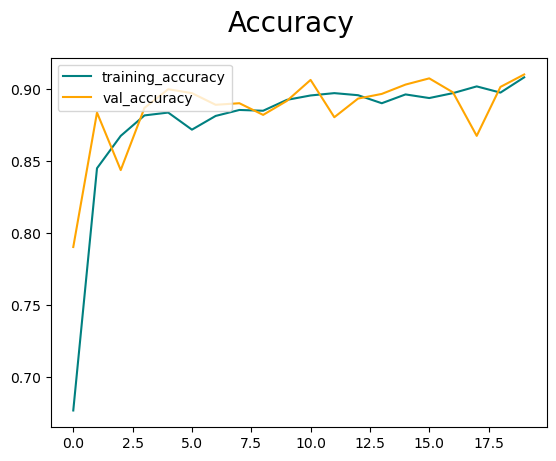

In [25]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Increase the number of parameters by increasing the third block convolutional layer to contain 64 filters instead of 16 filters.

In [26]:
model2 = Sequential()

In [27]:
model2.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model2.add(MaxPooling2D())

model2.add(Conv2D(32, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Conv2D(64, (3,3), 1, activation='relu'))
model2.add(MaxPooling2D())

model2.add(Flatten())

model2.add(Dense(256, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [28]:
model2.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 1, 1, 64)        

In [30]:
hist = model2.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.5514 - accuracy: 0.6945 - val_loss: 0.3420 - val_accuracy: 0.8599
Epoch 2/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3303 - accuracy: 0.8612 - val_loss: 0.3066 - val_accuracy: 0.8793
Epoch 3/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3232 - accuracy: 0.8651 - val_loss: 0.2893 - val_accuracy: 0.8815
Epoch 4/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2770 - accuracy: 0.8865 - val_loss: 0.2656 - val_accuracy: 0.8960
Epoch 5/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2915 - accuracy: 0.8782 - val_loss: 0.3271 - val_accuracy: 0.8556
Epoch 6/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2672 - accuracy: 0.8818 - val_loss: 0.2396 - val_accuracy: 0.9041
Epoch 7/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2612 - accuracy: 0.8921 - val_loss: 0.2454 - val_accuracy: 0.9019
Epoch 

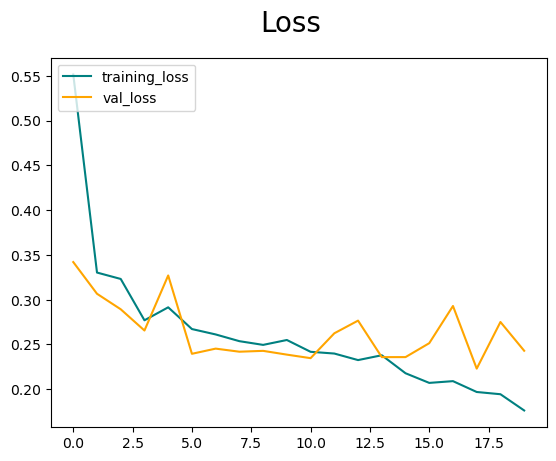

In [31]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

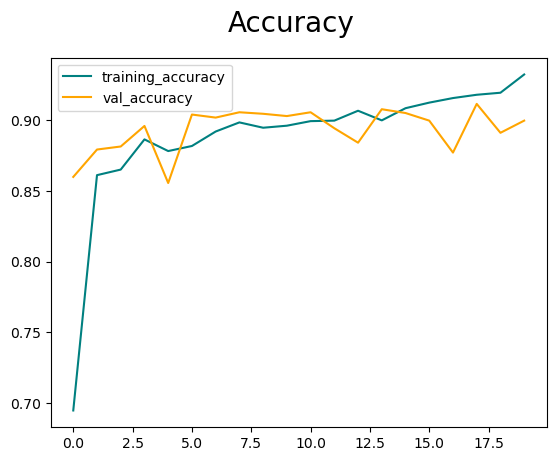

In [32]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Add parameters to the dense layer

In [33]:
model3 = Sequential()

In [34]:
model3.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model3.add(MaxPooling2D())

model3.add(Conv2D(32, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Conv2D(16, (3,3), 1, activation='relu'))
model3.add(MaxPooling2D())

model3.add(Flatten())

model3.add(Dense(256, activation='relu'))
model3.add(Dense(256, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [35]:
model3.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 1, 1, 16)        

In [37]:
hist = model3.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.5074 - accuracy: 0.7380 - val_loss: 0.3965 - val_accuracy: 0.8319
Epoch 2/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3309 - accuracy: 0.8605 - val_loss: 0.3078 - val_accuracy: 0.8669
Epoch 3/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3214 - accuracy: 0.8655 - val_loss: 0.3310 - val_accuracy: 0.8561
Epoch 4/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3007 - accuracy: 0.8743 - val_loss: 0.2907 - val_accuracy: 0.8788
Epoch 5/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2872 - accuracy: 0.8800 - val_loss: 0.5780 - val_accuracy: 0.7495
Epoch 6/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2847 - accuracy: 0.8827 - val_loss: 0.2912 - val_accuracy: 0.8804
Epoch 7/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2763 - accuracy: 0.8890 - val_loss: 0.2723 - val_accuracy: 0.8874
Epoch 

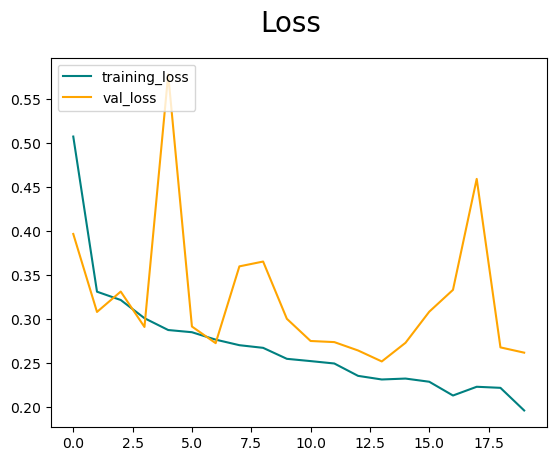

In [38]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

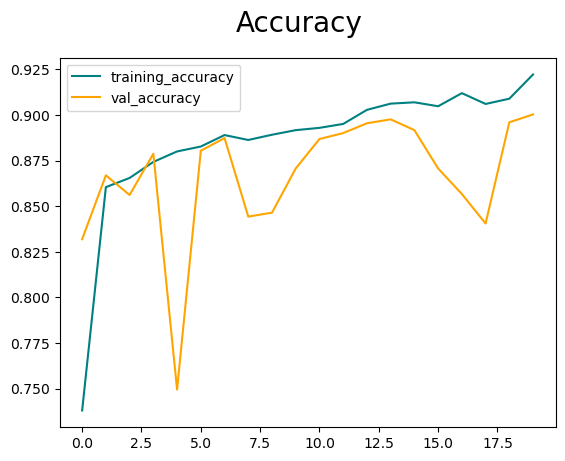

In [39]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [40]:
model4 = Sequential()

In [41]:
from tensorflow.keras.regularizers import L2

In [42]:
model4.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model4.add(MaxPooling2D())

model4.add(Conv2D(32, (3,3), 1, activation='relu'))
model4.add(MaxPooling2D())

model4.add(Conv2D(16, (3,3), 1, activation='relu'))
model4.add(MaxPooling2D())

model4.add(Flatten())

model4.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model4.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model4.add(Dense(1, activation='sigmoid'))

In [43]:
model4.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model4.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 3, 3, 16)          4624      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 1, 1, 16)        

In [45]:
hist = model4.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.6300 - accuracy: 0.6920 - val_loss: 0.4088 - val_accuracy: 0.8481
Epoch 2/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3820 - accuracy: 0.8515 - val_loss: 0.3352 - val_accuracy: 0.8728
Epoch 3/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3328 - accuracy: 0.8707 - val_loss: 0.3279 - val_accuracy: 0.8739
Epoch 4/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3164 - accuracy: 0.8761 - val_loss: 0.2953 - val_accuracy: 0.8890
Epoch 5/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3041 - accuracy: 0.8824 - val_loss: 0.2839 - val_accuracy: 0.8960
Epoch 6/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2866 - accuracy: 0.8881 - val_loss: 0.2843 - val_accuracy: 0.8928
Epoch 7/20
174/174 [==============================] - 1s 7ms/step - loss: 0.2819 - accuracy: 0.8899 - val_loss: 0.3127 - val_accuracy: 0.8734
Epoch 

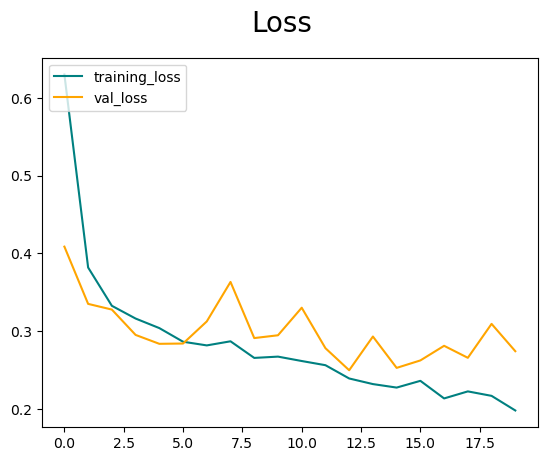

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

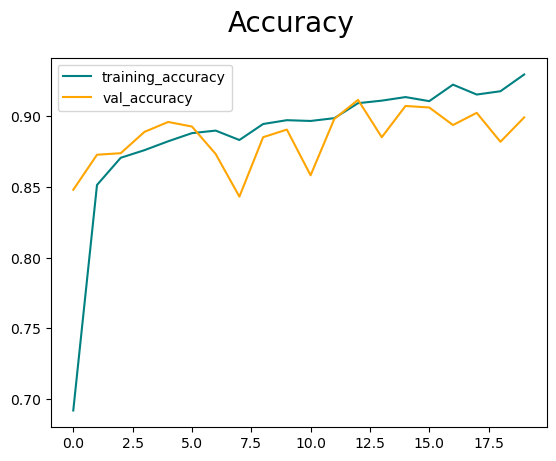

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [49]:
model5 = Sequential()

In [50]:
model5.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model5.add(MaxPooling2D())

model5.add(Conv2D(32, (3,3), 1, activation='relu'))
model5.add(MaxPooling2D())

model5.add(Conv2D(64, (3,3), 1, activation='relu'))
model5.add(MaxPooling2D())

model5.add(Flatten())

model5.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model5.add(Dropout(0.05))
model5.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model5.add(Dropout(0.05))
model5.add(Dense(1, activation='sigmoid'))

In [51]:
model5.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [52]:
model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 25, 25, 16)        448       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 12, 12, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 5, 5, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 3, 3, 64)          18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 1, 1, 64)        

In [53]:
hist = model5.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.6485 - accuracy: 0.7085 - val_loss: 0.3898 - val_accuracy: 0.8572
Epoch 2/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3672 - accuracy: 0.8572 - val_loss: 0.3243 - val_accuracy: 0.8852
Epoch 3/20
174/174 [==============================] - 1s 7ms/step - loss: 0.3228 - accuracy: 0.8755 - val_loss: 0.3671 - val_accuracy: 0.8545
Epoch 4/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3235 - accuracy: 0.8745 - val_loss: 0.2977 - val_accuracy: 0.8912
Epoch 5/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3147 - accuracy: 0.8745 - val_loss: 0.3014 - val_accuracy: 0.8815
Epoch 6/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3058 - accuracy: 0.8795 - val_loss: 0.2931 - val_accuracy: 0.8901
Epoch 7/20
174/174 [==============================] - 1s 8ms/step - loss: 0.2767 - accuracy: 0.8930 - val_loss: 0.3133 - val_accuracy: 0.8739
Epoch 

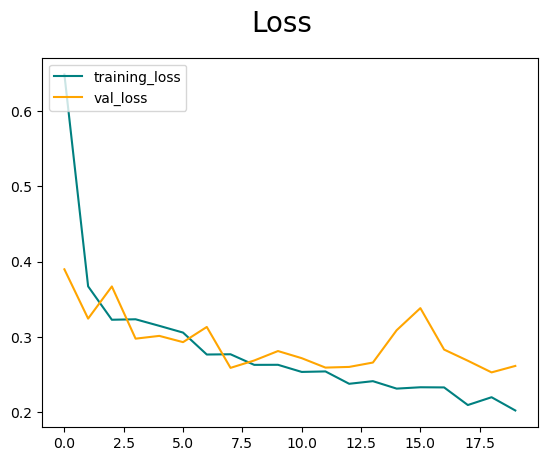

In [54]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

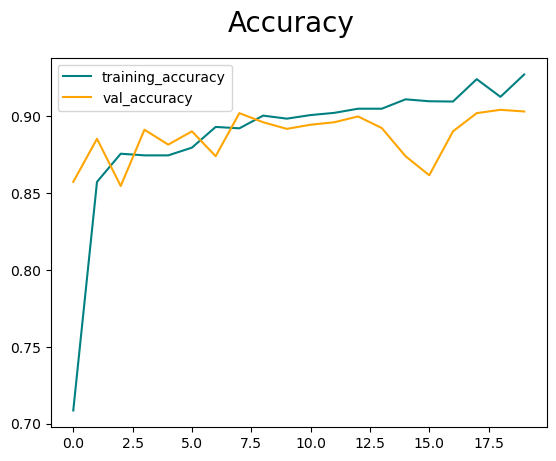

In [55]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [56]:
model6 = Sequential()

In [57]:
model6.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(27,27,3)))
model6.add(MaxPooling2D())

model6.add(Conv2D(32, (3,3), 1, activation='relu'))
model6.add(MaxPooling2D())

model6.add(Conv2D(64, (3,3), 1, activation='relu'))
model6.add(MaxPooling2D())

model6.add(Flatten())

model6.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model6.add(Dropout(0.05))
model6.add(Dense(256, activation='relu',kernel_regularizer=L2(0.001)))
model6.add(Dropout(0.05))
model6.add(Dense(1, activation='sigmoid'))

In [59]:
from tensorflow.keras.optimizers import Adam
opt_1 = Adam(learning_rate = 0.001)

In [60]:
model6.compile(optimizer=opt_1, loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [61]:
hist = model6.fit(train, epochs = 20, validation_data = val)

Epoch 1/20
174/174 [==============================] - 2s 8ms/step - loss: 0.6038 - accuracy: 0.7378 - val_loss: 0.3897 - val_accuracy: 0.8475
Epoch 2/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3529 - accuracy: 0.8693 - val_loss: 0.3045 - val_accuracy: 0.8852
Epoch 3/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3155 - accuracy: 0.8798 - val_loss: 0.2910 - val_accuracy: 0.8917
Epoch 4/20
174/174 [==============================] - 1s 8ms/step - loss: 0.3101 - accuracy: 0.8797 - val_loss: 0.2770 - val_accuracy: 0.9019
Epoch 5/20
174/174 [==============================] - 1s 8ms/step - loss: 0.2858 - accuracy: 0.8913 - val_loss: 0.2630 - val_accuracy: 0.8987
Epoch 6/20
174/174 [==============================] - 1s 8ms/step - loss: 0.2809 - accuracy: 0.8922 - val_loss: 0.2564 - val_accuracy: 0.9036
Epoch 7/20
174/174 [==============================] - 1s 8ms/step - loss: 0.2786 - accuracy: 0.8921 - val_loss: 0.2763 - val_accuracy: 0.8976
Epoch 

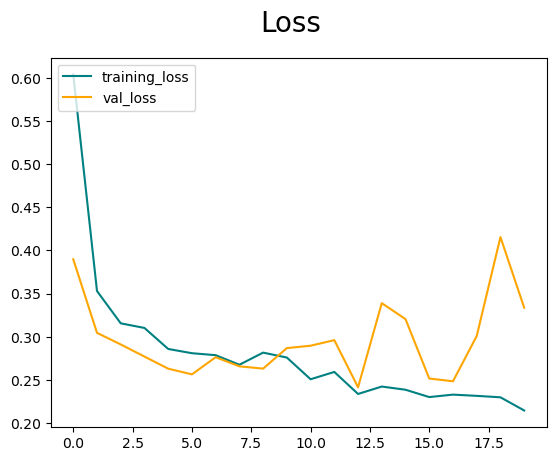

In [62]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='training_loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

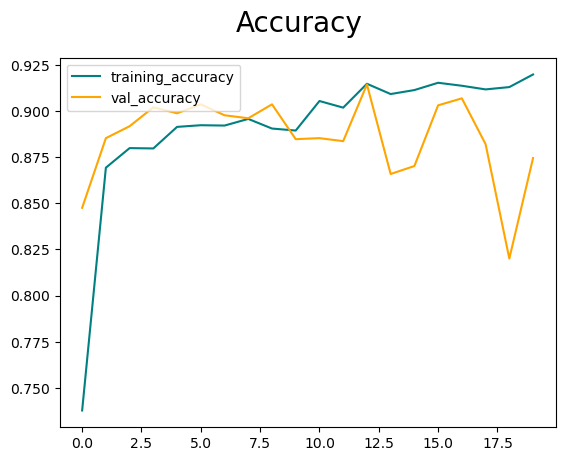

In [63]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='training_accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()